In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
df_stats = df.describe().transpose().drop(columns=['count', '25%', '50%', '75%']).rename(columns={"mean": "Media", "min": "Mínimo", "max": "Máximo", "std": "Desv. Est."})
df_stats

,Media,Desv. Est.,Mínimo,Máximo
Time,9.481386e+04,47488.145955,0.000000,172792.000000
V1,1.177406e-15,1.958696,-56.407510,2.454930
V2,3.385972e-16,1.651309,-72.715728,22.057729
V3,-1.399346e-15,1.516255,-48.325589,9.382558
V4,2.094652e-15,1.415869,-5.683171,16.875344
V5,1.006112e-15,1.380247,-113.743307,34.801666
V6,1.495147e-15,1.332271,-26.160506,73.301626
V7,-5.624576e-16,1.237094,-43.557242,120.589494
V8,1.147119e-16,1.194353,-73.216718,20.007208
V9,-2.411719e-15,1.098632,-13.434066,15.594995


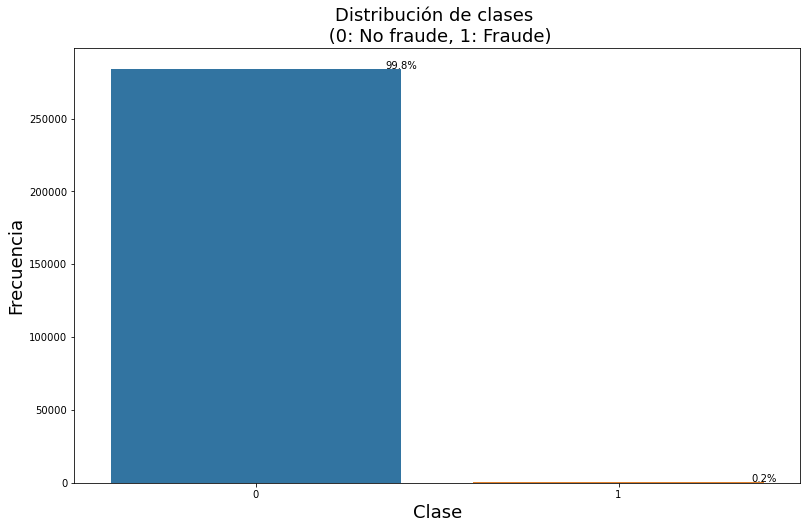

In [52]:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

plt.figure(figsize=(13,8))
total = df.shape[0]
          
ax = sns.countplot('Class', data=df)

#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Distribución de clases \n (0: No fraude, 1: Fraude)', fontsize=18)
plt.xlabel('Clase', fontsize=18)
plt.ylabel('Frecuencia', fontsize=18)
plt.savefig('./plots/dist_fraude.png')

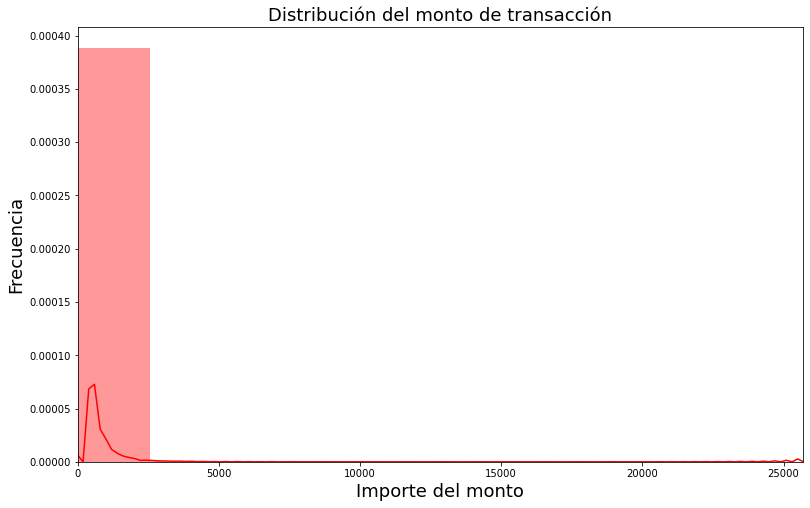

In [69]:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
amount_val = df['Amount'].values

plt.figure(figsize=(13,8))
ax = sns.distplot(amount_val, color='r', bins=10)
ax.set_title('Distribución del monto de transacción', fontsize=18)
ax.set_xlim([min(amount_val), max(amount_val)])

plt.xlabel('Importe del monto', fontsize=18)
plt.ylabel('Frecuencia', fontsize=18)
plt.savefig('./plots/dist_monto.png')

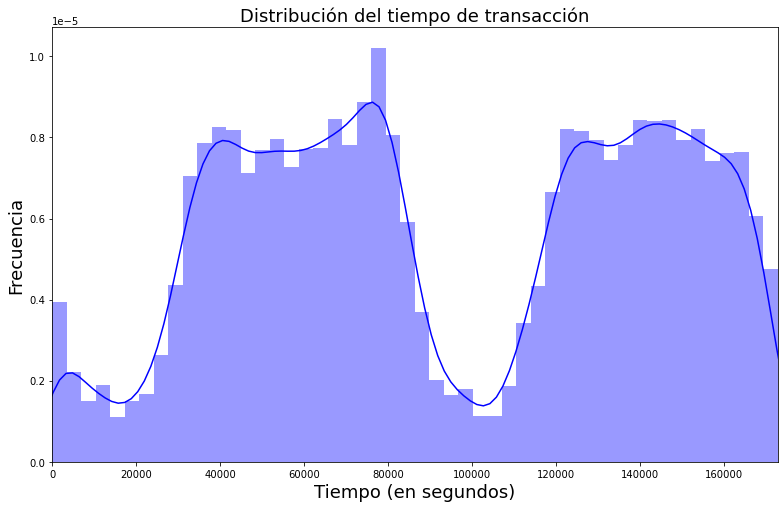

In [68]:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

time_val = df['Time'].values

plt.figure(figsize=(13,8))
ax = sns.distplot(time_val, color='b')
ax.set_title('Distribución del tiempo de transacción', fontsize=18)
ax.set_xlim([min(time_val), max(time_val)])

plt.xlabel('Tiempo (en segundos)', fontsize=18)
plt.ylabel('Frecuencia', fontsize=18)

plt.savefig('./plots/dist_tiempo.png')

In [9]:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
163387,115892.0,-1.051910,1.229173,-0.812909,-0.978672,0.728238,1.311118,-0.225094,1.475443,-0.321585,...,-0.070234,-0.142584,0.261486,-1.788261,-0.709749,0.285731,0.164630,0.001524,1.98,0
234632,148053.0,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1.59,1
154257,100939.0,-1.249947,0.819876,2.064182,-0.794514,-0.457685,0.343538,-0.487230,0.790838,1.376466,...,-0.090777,-0.107628,-0.277442,-0.523513,0.250300,0.597444,0.096803,0.025870,14.95,0
191690,129371.0,1.183931,3.057250,-6.161997,5.543972,1.617041,-1.848006,-1.005508,0.339937,-2.959806,...,0.109185,-0.931072,-0.064175,-0.007013,0.345419,0.064558,0.476629,0.323740,0.00,1
102442,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1


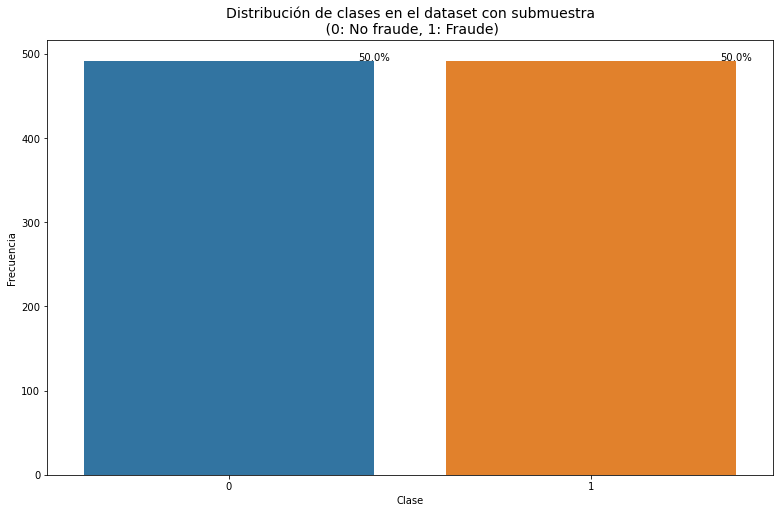

In [43]:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

plt.figure(figsize=(13,8))
total = new_df.shape[0]
          
ax = sns.countplot('Class', data=new_df)
ax.set(xlabel='Clase', ylabel='Frecuencia')
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Distribución de clases en el dataset con submuestra\n (0: No fraude, 1: Fraude)', fontsize=14)

plt.savefig('./plots/dist_fraude.png')


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

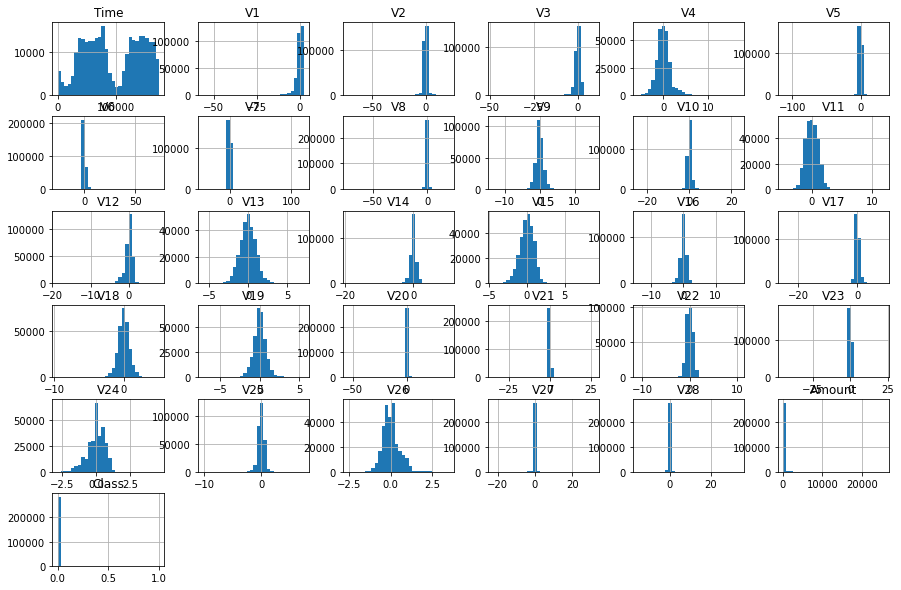

In [19]:
df.hist(bins=30, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

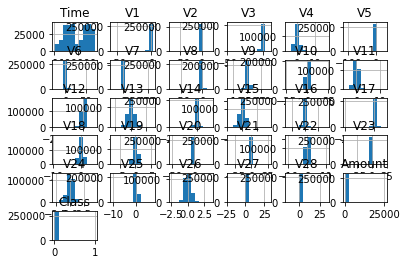

In [44]:
df.hist()